<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(1_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n20.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,63.652673,33.086988,76.022612,12.840183,195.602455,186.676499,8.925957
1,0.0,1.0,60.158474,77.071397,61.200457,-4.254163,204.176165,210.099319,-5.923154
2,0.0,2.0,52.485428,98.828353,56.076295,-4.270909,213.119167,217.791259,-4.672092
3,0.0,3.0,54.202916,66.855926,26.607886,18.725087,176.391815,161.683262,14.708553
4,0.0,4.0,35.837302,81.136926,21.849856,11.733333,160.557418,151.969700,8.587718
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,62.688047,86.063844,21.277753,13.233418,193.263061,173.018458,20.244604
29996,999.0,26.0,90.473350,40.645771,39.681268,-0.510925,180.289465,183.591939,-3.302474
29997,999.0,27.0,56.664247,50.597088,44.004773,5.125600,166.391708,159.382368,7.009340
29998,999.0,28.0,71.471966,29.639717,96.566469,1.809542,209.487694,210.255711,-0.768018


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,63.652673,33.086988,76.022612,12.840183,195.602455,186.676499,8.925957
1,0.0,1.0,60.158474,77.071397,61.200457,-4.254163,204.176165,210.099319,-5.923154
2,0.0,2.0,52.485428,98.828353,56.076295,-4.270909,213.119167,217.791259,-4.672092
3,0.0,3.0,54.202916,66.855926,26.607886,18.725087,176.391815,161.683262,14.708553
4,0.0,4.0,35.837302,81.136926,21.849856,11.733333,160.557418,151.969700,8.587718
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,62.688047,86.063844,21.277753,13.233418,193.263061,173.018458,20.244604
29996,999.0,26.0,90.473350,40.645771,39.681268,-0.510925,180.289465,183.591939,-3.302474
29997,999.0,27.0,56.664247,50.597088,44.004773,5.125600,166.391708,159.382368,7.009340
29998,999.0,28.0,71.471966,29.639717,96.566469,1.809542,209.487694,210.255711,-0.768018


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    63.652673  33.086988  76.022612  12.840183  195.602455   
      1.0    60.158474  77.071397  61.200457  -4.254163  204.176165   
      2.0    52.485428  98.828353  56.076295  -4.270909  213.119167   
      3.0    54.202916  66.855926  26.607886  18.725087  176.391815   
      4.0    35.837302  81.136926  21.849856  11.733333  160.557418   
...                ...        ...        ...        ...         ...   
999.0 25.0   62.688047  86.063844  21.277753  13.233418  193.263061   
      26.0   90.473350  40.645771  39.681268  -0.510925  180.289465   
      27.0   56.664247  50.597088  44.004773   5.125600  166.391708   
      28.0   71.471966  29.639717  96.566469   1.809542  209.487694   
      29.0   44.376303  89.658256  95.393337 -10.523521  228.904375   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    186.676499   8.925957  
      1.0    210.099319  -5.923154  
      2.0    217.791259  -4.672092  
      3.0    161.683262  14.708553  
      4.0    151.969700   8.587718  
...                 ...        ...  
999.0 25.0   173.018458  20.244604  
      26.0   183.591939  -3.302474  
      27.0   159.382368   7.009340  
      28.0   210.255711  -0.768018  
      29.0   229.786934  -0.882559  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    63.652673  33.086988  76.022612  12.840183  195.602455   
      1.0    60.158474  77.071397  61.200457  -4.254163  204.176165   
      2.0    52.485428  98.828353  56.076295  -4.270909  213.119167   
      3.0    54.202916  66.855926  26.607886  18.725087  176.391815   
      4.0    35.837302  81.136926  21.849856  11.733333  160.557418   
...                ...        ...        ...        ...         ...   
999.0 25.0   62.688047  86.063844  21.277753  13.233418  193.263061   
      26.0   90.473350  40.645771  39.681268  -0.510925  180.289465   
      27.0   56.664247  50.597088  44.004773   5.125600  166.391708   
      28.0   71.471966  29.639717  96.566469   1.809542  209.487694   
      29.0   44.376303  89.658256  95.393337 -10.523521  228.904375   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    186.676499   8.925957  
      1.0    210.099319  -5.923154  
      2.0    217.791259  -4.672092  
      3.0    161.683262  14.708553  
      4.0    151.969700   8.587718  
...                 ...        ...  
999.0 25.0   173.018458  20.244604  
      26.0   183.591939  -3.302474  
      27.0   159.382368   7.009340  
      28.0   210.255711  -0.768018  
      29.0   229.786934  -0.882559  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,63.652673,33.086988,76.022612,12.840183,195.602455,186.676499,8.925957
1,0.0,1.0,60.158474,77.071397,61.200457,-4.254163,204.176165,210.099319,-5.923154
2,0.0,2.0,52.485428,98.828353,56.076295,-4.270909,213.119167,217.791259,-4.672092
3,0.0,3.0,54.202916,66.855926,26.607886,18.725087,176.391815,161.683262,14.708553
4,0.0,4.0,35.837302,81.136926,21.849856,11.733333,160.557418,151.969700,8.587718
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,62.688047,86.063844,21.277753,13.233418,193.263061,173.018458,20.244604
29996,999.0,26.0,90.473350,40.645771,39.681268,-0.510925,180.289465,183.591939,-3.302474
29997,999.0,27.0,56.664247,50.597088,44.004773,5.125600,166.391708,159.382368,7.009340
29998,999.0,28.0,71.471966,29.639717,96.566469,1.809542,209.487694,210.255711,-0.768018


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    63.652673  33.086988  76.022612  12.840183  195.602455   
      1.0    60.158474  77.071397  61.200457  -4.254163  204.176165   
      2.0    52.485428  98.828353  56.076295  -4.270909  213.119167   
      3.0    54.202916  66.855926  26.607886  18.725087  176.391815   
      4.0    35.837302  81.136926  21.849856  11.733333  160.557418   
...                ...        ...        ...        ...         ...   
999.0 25.0   62.688047  86.063844  21.277753  13.233418  193.263061   
      26.0   90.473350  40.645771  39.681268  -0.510925  180.289465   
      27.0   56.664247  50.597088  44.004773   5.125600  166.391708   
      28.0   71.471966  29.639717  96.566469   1.809542  209.487694   
      29.0   44.376303  89.658256  95.393337 -10.523521  228.904375   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    186.676499   8.925957  
      1.0    210.099319  -5.923154  
      2.0    217.791259  -4.672092  
      3.0    161.683262  14.708553  
      4.0    151.969700   8.587718  
...                 ...        ...  
999.0 25.0   173.018458  20.244604  
      26.0   183.591939  -3.302474  
      27.0   159.382368   7.009340  
      28.0   210.255711  -0.768018  
      29.0   229.786934  -0.882559  

[30000 rows x 7 columns]

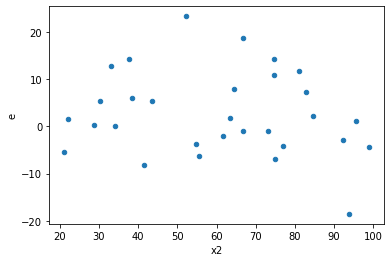

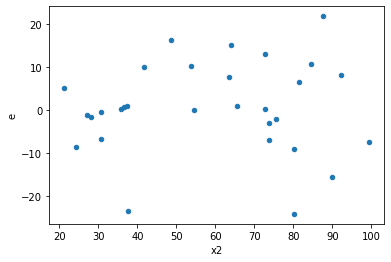

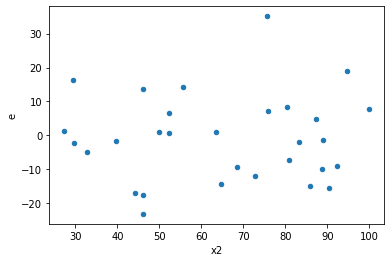

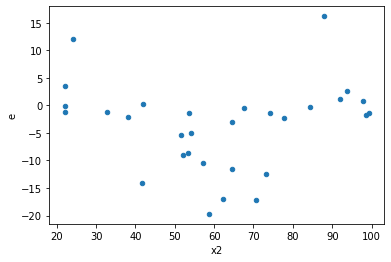

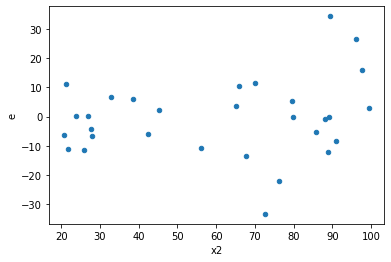

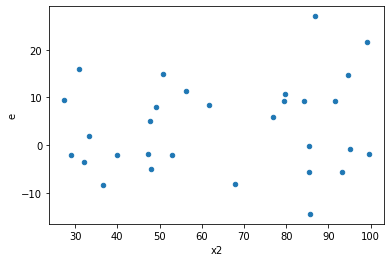

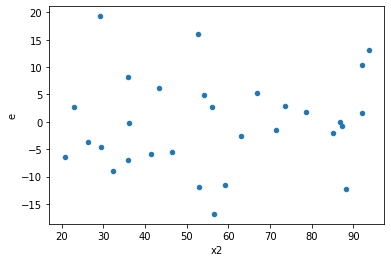

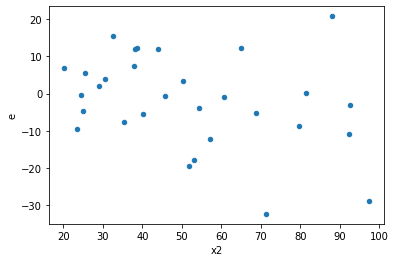

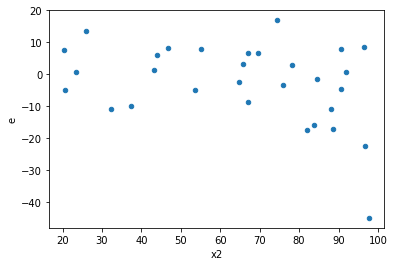

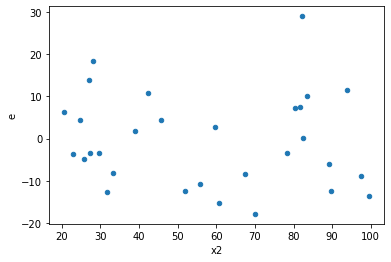

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,321.01559390574994,644.3714599448274,35.668399322861106,71.5968288827586,2.007290213241213,0.31399118778661994,0.84300440610669,0.15699559389330997,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,789.2952915617343,1741.372684358234,87.6994768401927,193.48585381758156,2.2062372637656025,0.2541394692123411,0.8729302653938295,0.12706973460617055,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,258.99357094695984,702.5012097854635,28.777063438551092,78.05568997616261,2.7124272128335227,0.15327588246810997,0.923362058765945,0.07663794123405498,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,1060.708461049638,3081.285861094634,117.85649567218199,342.36509567718156,2.90493191507637,0.1279569130822349,0.9360215434588826,0.06397845654111745,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,633.3959097287525,810.3447141466236,70.37732330319471,90.03830157184706,1.2793652464438052,0.7195930892604703,0.6402034553697649,0.35979654463023514,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,706.2160403642015,1707.17790652042,78.46844892935572,189.68643405782444,2.4173592908481862,0.2046689032075144,0.8976655483962428,0.1023344516037572,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,407.36226020003494,1656.5638550855604,45.262473355559436,184.06265056506226,4.066561920272403,0.04848145805255899,0.9757592709737205,0.024240729026279495,Reject001=1 : Homoscedasticity
9.0,9.0,9.0,849.0541099696525,850.3041630422538,94.3393455521836,94.4782403380282,1.001472289054282,0.9982873631831648,0.5008563184084176,0.4991436815915824,Reject001=1 : Homoscedasticity
10.0,9.0,9.0,831.1978930764255,1280.0239922450862,92.35532145293617,142.2248880272318,1.5399750202776235,0.530271629126704,0.734864185436648,0.265135814563352,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,321.01559390574994,644.3714599448274,35.668399322861106,71.5968288827586,2.007290213241213,0.31399118778661994,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,789.2952915617343,1741.372684358234,87.6994768401927,193.48585381758156,2.2062372637656025,0.2541394692123411,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,2015.5901684538417,1455.5312876409696,223.95446316153797,161.7256986267744,0.7221365287554994,0.6355364471814536,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,258.99357094695984,702.5012097854635,28.777063438551092,78.05568997616261,2.7124272128335227,0.15327588246810997,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,1060.708461049638,3081.285861094634,117.85649567218199,342.36509567718156,2.90493191507637,0.1279569130822349,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,633.3959097287525,810.3447141466236,70.37732330319471,90.03830157184706,1.2793652464438052,0.7195930892604703,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,798.2161827770136,453.7773122691218,88.69068697522374,50.41970136323576,0.5684892414614039,0.4129150710836262,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,706.2160403642015,1707.17790652042,78.46844892935572,189.68643405782444,2.4173592908481862,0.2046689032075144,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,407.36226020003494,1656.5638550855604,45.262473355559436,184.06265056506226,4.066561920272403,0.04848145805255899,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      963
Reject001=0 : Heteroscedasticity     37
Name: Result_test, dtype: int64